# CROSS VALIDATION METHODS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset('titanic')

Titanic dataset is choosed because it comes under classification problem statement

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Handling missing values

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df['age']=df['age'].fillna(df['age'].median())

In [8]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [9]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [10]:
df.drop(['deck'],axis=1,inplace=True)

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## Handling categorical features

In [12]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['embarked']=LabelEncoder().fit_transform(df['embarked'])
df['who']=LabelEncoder().fit_transform(df['who'])
df['adult_male']=LabelEncoder().fit_transform(df['adult_male'])
df['embark_town']=LabelEncoder().fit_transform(df['embark_town'])
df['alive']=LabelEncoder().fit_transform(df['alive'])
df['alone']=LabelEncoder().fit_transform(df['alone'])
df['class']=LabelEncoder().fit_transform(df['class'])

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,0,1


## Feature selection

<AxesSubplot:>

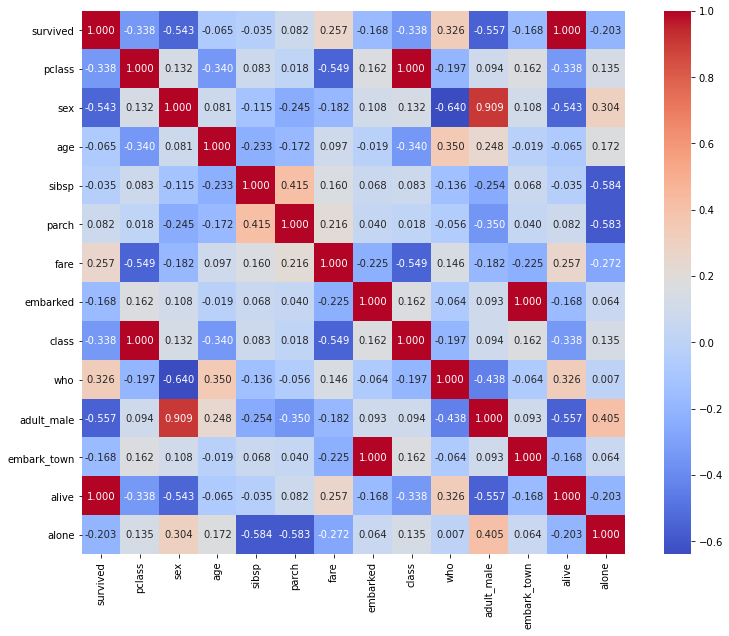

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(method="pearson"),annot=True,square= True,fmt='.3f',cmap= 'coolwarm')

In [19]:
def cor(d,threshold):
    col_corr=set()
    cmatrix=d.corr(method="pearson")
    for i in range(len(d.columns)):
        for j in range(i):
            if(cmatrix.iloc[i,j]>threshold):
                col=cmatrix.columns[i]
                col_corr.add(col)
    return col_corr  

In [20]:
c=cor(df,0.90)
c

{'adult_male', 'alive', 'class', 'embark_town'}

In [21]:
df.drop(['adult_male', 'alive', 'class', 'embark_town'],axis=1,inplace=True)

In [22]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,2,1
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1


## HOLDOUT VALIDATION APPROACH - TRAIN TEST SPLIT 

In [92]:
X=df.drop('survived',axis=1)
y=df['survived']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [37]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
69,3,1,26.0,2,0,8.6625,2,1,0
85,3,0,33.0,3,0,15.8500,2,2,0
794,3,1,25.0,0,0,7.8958,2,1,1
161,2,0,40.0,0,0,15.7500,2,2,1
815,1,1,28.0,0,0,0.0000,2,1,1


In [38]:
X_train.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.7761194029850746


Here in the train test split the model score will get keep on changing if we change the random_state. So this is one of the draw back with this method

## K-FOLD CROSS VALIDATION

In [128]:
X=df.drop('survived',axis=1)
y=df['survived']

In [129]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(n_splits=10)

In [130]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.71111111 0.79775281 0.71910112 0.79775281 0.78651685 0.78651685
 0.79775281 0.7752809  0.83146067 0.82022472]
0.7823470661672909


In [155]:
predictions = cross_val_predict(model, df, y, cv=5)

## STRATIFIED K-FOLD CROSS VALIDATION

In [150]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [172]:
X=df.drop('survived',axis=1)
y=df['survived']

In [152]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.7778293892411023


In [154]:
predictions = cross_val_predict(model, df, y, cv=10)

## LEAVE ON OUT CROSS VALIDATION (LOOCV)

In [156]:
from sklearn.model_selection import LeaveOneOut
model=DecisionTreeClassifier()
leave_validation=LeaveOneOut()
results=cross_val_score(model,X,y,cv=leave_validation)

In [157]:
print(results)

[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.

In [158]:
print(np.mean(results))

0.7833894500561167


## REPEATED RANDOM TRAIN TEST SPLITS

This technique is a hybrid of traditional train-test splitting and the k-fold cross-validation method. In this technique, we create random splits of the data in the training-test set manner and then repeat the process of splitting and evaluating the algorithm multiple times, just like the cross-validation method.

In [163]:
from sklearn.model_selection import ShuffleSplit
model=DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
results=cross_val_score(model,X,y,cv=ssplit)

In [164]:
results

array([0.79850746, 0.77238806, 0.7761194 , 0.77238806, 0.74253731,
       0.82462687, 0.79104478, 0.80223881, 0.77985075, 0.75373134])

In [165]:
np.mean(results)

0.7813432835820895

## We can able to see in all the results of different types of validations the r2score that is cross val score is more or less same

# SELECTING THE SUITABLE MODEL USING CROSS VALIDATION

In [173]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, X, y, cv=10, scoring ='accuracy').mean())

0.7183645443196005


In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy').mean())

0.8002247191011236


In [175]:
model = DecisionTreeClassifier()
print (cross_val_score(model, X, y, cv=10, scoring = 'accuracy').mean())

0.787940074906367


## So among KNN,Logistic regression and decision tree classifier, Logistic regression gives comparitively better accuracy than other two algorithms.

## So we can use logistic regression for this dataset